In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix
# from sklearn.metrics import jaccard_similarity_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
!pip install folium
import webbrowser
from folium import plugins
!pip install imblearn
from imblearn.over_sampling import SMOTE
%matplotlib inline

     |████████████████████████████████| 102kB 11.1MB/s ta 0:00:01
     |████████████████████████████████| 174kB 12.9MB/s eta 0:00:01
     |████████████████████████████████| 307kB 26.2MB/s eta 0:00:01
     |████████████████████████████████| 6.8MB 37.9MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


ImportError: cannot import name 'MultiOutputMixin'

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
main_df = pd.read_csv(body)
#main_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
main_df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


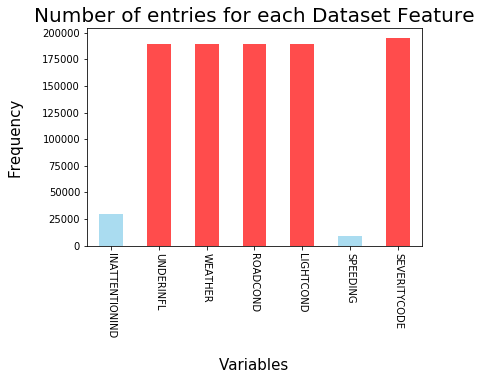

In [5]:
#Understanding the descriptive statistics

descriptive_stats= main_df.describe(include='all')

descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

color_yo=['skyblue','red','red','red','red','skyblue','red']
descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color_yo],legend=None)
plt.title('Number of entries for each Dataset Feature', fontsize=20)
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=270)
plt.show()

NameError: name 'addtype' is not defined

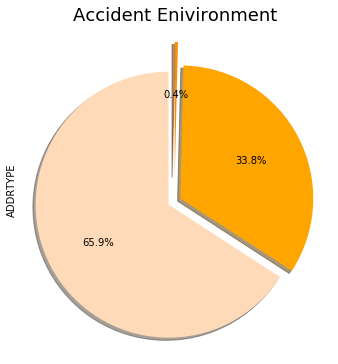

In [32]:
explode_list = [0.05, 0.05, 0.2]
color_list=['peachpuff','orange','darkorange']
addrtype=main_df['ADDRTYPE'].value_counts()

addrtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            labeldistance=1.15,
            colors=color_list,
            explode=explode_list)

plt.title('Accident Enivironment', fontsize=18)
plt.axis('scaled')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()

In [77]:
#
main_df['INCKEY'].nunique()


main_df["INATTENTIONIND"].replace("Y", 1, inplace=True)
main_df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)


main_df["UNDERINFL"].replace("N", 0, inplace=True)
main_df["UNDERINFL"].replace("Y", 1, inplace=True)
main_df["UNDERINFL"].replace()


main_df["SPEEDING"].replace("Y", 1, inplace=True)
main_df["SPEEDING"].replace(np.nan, 0, inplace=True)

# Replacements are in 3 seperate categories, Day, Night-lit, and Night-unlit

main_df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
main_df["LIGHTCOND"].replace(["Dark - Street Lights On","Dusk","Dawn"], 1, inplace=True)
main_df["LIGHTCOND"].replace(["Dark - No Street Lights","Dark - Street Lights Off","Dark - Unknown Lighting"], 2, inplace=True)
main_df["LIGHTCOND"].replace(["Other"],"Unknown", inplace=True)

# Replacements are in 4 seperate categories, Clear, Cloudy, Wind-related, and Raining

main_df["WEATHER"].replace("Clear", 0, inplace=True)
main_df["WEATHER"].replace(["Overcast","Partly Cloudy"], 1, inplace=True)
main_df["WEATHER"].replace(["Fog/Smog/Smoke","Blowing Sand/Dirt","Severe Crosswind"], 2, inplace=True)
main_df["WEATHER"].replace(["Sleet/Hail/Freezing Rain","Snowing","Raining"], 3, inplace=True)
main_df["WEATHER"].replace("Other", "Unknown", inplace=True)

# Replacements are in 3 seperate categories, Dry, Bumpy, Wet/Slippery

main_df["ROADCOND"].replace("Dry", 0, inplace=True)
main_df["ROADCOND"].replace(["Snow/Slush","Sand/Mud/Dirt"], 1, inplace=True)
main_df["ROADCOND"].replace(["Wet","Ice","Standing Water","Oil"], 2, inplace=True)
main_df["ROADCOND"].replace(["Other","NAN"], "Unknown", inplace=True)

In [53]:
selected_columns=main_df[["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
feature_df=selected_columns.copy()
feature_df.dropna(axis=1,how='all',inplace=True)
feature_stats=feature_df.describe()
feature_stats

,X,Y,INCKEY,INATTENTIONIND,SPEEDING,SEVERITYCODE
count,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673.000000
mean,-122.330518,47.619543,141091.456350,0.153103,0.047942,1.298901
std,0.029976,0.056157,86634.402737,0.360088,0.213644,0.457778
min,-122.419091,47.495573,1001.000000,0.000000,0.000000,1.000000
25%,-122.348673,47.575956,70383.000000,0.000000,0.000000,1.000000
50%,-122.330224,47.615369,123363.000000,0.000000,0.000000,1.000000
75%,-122.311937,47.663664,203319.000000,0.000000,0.000000,2.000000
max,-122.238949,47.734142,331454.000000,1.000000,1.000000,2.000000


In [54]:
np.count_nonzero(feature_df['UNDERINFL'])

94399

In [1]:
feature_df["SPEEDING"]=feature_df["SPEEDING"].astype(int)
feature_df["INATTENTIONIND"]=feature_df["INATTENTIONIND"].astype(int)
feature_df["UNDERINFL"]=feature_df["UNDERINFL"].astype(int)

NameError: name 'feature_df' is not defined

In [71]:
lightcondsize = feature_df ["LIGHTCOND"].size

feature_df["LIGHTCOND"].fillna(3,inplace=True)

featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'

lightcond = feature_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[featureinlightcond]

lightcond[0:9036]=0
lightcond[9036:13417]=1
lightcond[13417:13961]=2

feature_df.loc [feature_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond

feature_df["LIGHTCOND"]=feature_df["LIGHTCOND"].astype(int)

In [72]:
feature_df["LIGHTCOND"].value_counts()

0    130343
1     61292
2      3038
Name: LIGHTCOND, dtype: int64

In [74]:
roadcondsize = feature_df ["ROADCOND"].size

featureinroadcond = feature_df ['ROADCOND'] == 'Unknown'

feature_df['ROADCOND'].fillna(0,inplace=True)

roadcond = feature_df['LIGHTCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]

roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:15163]=2

feature_df.loc[feature_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
feature_df["ROADCOND"]=feature_df["ROADCOND"].astype(int)

In [78]:
weathersize = feature_df ["WEATHER"].size

featureinweather = feature_df ['WEATHER'] == 'Unknown'

feature_df['WEATHER'].fillna(0,inplace=True)

weather = feature_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]

weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:15864]=3

feature_df.loc[feature_df.WEATHER == "Unknown", 'WEATHER'] = weather
feature_df["WEATHER"]=feature_df["WEATHER"].astype(int)

ValueError: invalid literal for int() with base 10: 'Raining'

In [29]:
#Converting Severity Code from (1/2) to (0/1)
severity_code = main_df['SEVERITYCODE'].values

headers = preprocessing.LabelEncoder()
headers.fit([0, 1])
severity_code = headers.transform (severity_code)

main_df ["SEVERITYCODE"] = severity_code

ValueError: y contains previously unseen labels: [2]

In [4]:
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

NameError: name 'main_df' is not defined

In [ ]:
ic = SMOTE (random_state=0)
ic_data_X, ic_data_y= ic.fit_sample(X_train, y_train)

small_df = feature_df.iloc [0:100005:5, 0:]

In [8]:
# Now it is time to load in the folium map of Seattle with a mark cluster object for the accidents

seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)
accidents = plugins.MarkerCluster().add_to(seattle_map)

for lat, lng, label, in zip(small_df.Y, small_df.X, small_df.SEVERITYCODE):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=label,
    ).add_to(accidents)

seattle_map.add_child(accidents)

seattle_map
seattle_map.save("seattlemap.html")
webbrowser.open("seattlemap.html")

NameError: name 'folium' is not defined

In [ ]:
# Confusion Matrix set up for all analysis (took the longest time for the project)

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhatDT, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
     
    neigh = KNeighborsClassifier(n_neighbors = n).fit(ic_data_X,ic_data_y)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [ ]:
# Logisitic regression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(ic_data_X,ic_data_y)

yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print(log_loss(y_test, yhat_prob))

print ("Accuracy: ", accuracy_score(yhatLR,y_test))
print (classification_report(y_test, yhatLR))

cnf_matrix = confusion_matrix(y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

In [ ]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DT.fit(ic_data_X,ic_data_y)

yhatDT = DT.predict(X_test)

print('Decision Tree Accuracy = ', accuracy_score(yhatDT, y_test))

In [ ]:
# Printing the confusion matrix visualizes the Accuracy of the Decision Tree

print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_test.ravel(), yhatDT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

print(classification_report(yhatDT,y_test))